## Testing CCNOT (Toffoli) gate using IBMQ

#### Load libraries

In [1]:
!pip install qiskit
import qiskit as qk
from qiskit import IBMQ,Aer

     |████████████████████████████████| 2.7MB 9.0MB/s eta 0:00:01
     |████████████████████████████████| 18.2MB 11.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 25.1MB/s eta 0:00:01
     |████████████████████████████████| 102kB 21.6MB/s ta 0:00:01
     |████████████████████████████████| 1.4MB 41.7MB/s eta 0:00:01
     |████████████████████████████████| 51kB 20.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 20.1MB/s eta 0:00:01
     |████████████████████████████████| 450kB 41.1MB/s eta 0:00:01
     |████████████████████████████████| 5.6MB 18.5MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 39.3MB/s eta 0:00:01
     |████████████████████████████████| 153kB 45.3MB/s eta 0:00:01
     |████████████████████████████████| 71kB 26.4MB/s eta 0:00:01
     |████████████████████████████████| 573kB 43.6MB/s eta 0:00:01
     |████████████████████████████████| 24.3MB 13.6MB/s eta 0:00:01K     |█████████████▏                  | 10.0MB 13.6MB/s eta 0:00:0

#### Qconfig_IBMQ_experience.py is file where you put the credentials in the form: 
#### APItoken = '' 
#### To get the token register at https://quantum-computing.ibm.com/account 

In [2]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

####   Alternatively you can insert token directly:             

In [4]:
#IBMQ.enable_account("your token here")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### See which backends are available

In [3]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

#### Choose the backend you like

In [16]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')
backend  = my_provider.get_backend('ibmq_qasm_simulator')

### Let's now write the code for quantum circuit: Toffoli (CCNOT) gate 
#### The CCNOT gate consists of two controlling Qbits and one target Qbit  https://en.wikipedia.org/wiki/Quantum_logic_gate
#### See the structure of this circuit here:  https://quantum-computing.ibm.com/composer/062b0e36efb468a2752b39a48327e86c </br>
#### This circuit consists of two repeating blocks which we call A and B gates        

#### Create 3 Qbits and 3 classical measurement gates

In [5]:
qr=qk.QuantumRegister(3)
cr=qk.ClassicalRegister(3)
qc=qk.QuantumCircuit(qr,cr)

### Prepare the state of controlling Qbits
####  Let's choose Qbits 1 and 2 as controlling ones and Qbit 0 as the target one. 
#### Initially all Qbits are in |0> state


In [6]:
#qc.x(qr[2])
qc.x(qr[1])

#### Write the A and B gates which are the elements of the Toffoli gate


In [7]:
# A gate
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

# A gate
qc.h(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

#### Create measurement gates in computational basis


In [8]:
measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)

#### Create measurement gates in superposition basis


In [9]:
measureX=qk.QuantumCircuit(qr,cr)
measureX.h(qr)
measureX.measure(qr,cr)

#### Add measurement gates to the cirquit

In [10]:
testZ=qc+measureZ
testX=qc+measureX

### Run the algorithm

#### 1) Choose backend: IBM cloud simulator

In [11]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmq_qasm_simulator')

jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
result=jobIBM.result()


Plot results as histogram

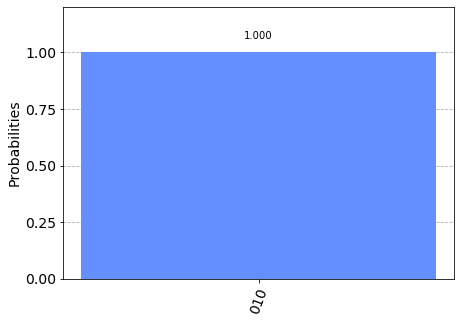

In [12]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 


<span style="color:blue"> **As the initial state is 010 it should not change by CCNOT. </br>
    As we see simulator gives the correct result** </span>

#### 2) Choose backend: Local qiskit simulator

In [13]:
backend=Aer.get_backend('qasm_simulator')

jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
result=jobIBM.result()

Plot results as histogram

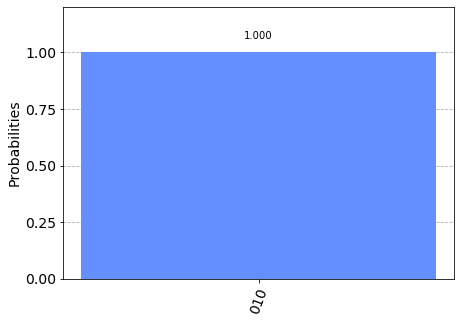

In [14]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 


#### 3) Choose backend: ibmqx2 chip

In [16]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')

jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
result=jobIBM.result()

Plot results as histogram

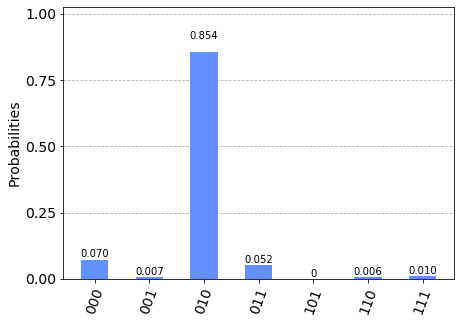

In [17]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 

#### As the initial state is 010 it should not change by CCNOT. 
####    As we see real experiment gives this result with probability 0.854

### Let's try another input state, e.g. 011

In [30]:
qr=qk.QuantumRegister(3)
cr=qk.ClassicalRegister(3)
qc=qk.QuantumCircuit(qr,cr)

qc.x(qr[2])
qc.x(qr[1])

# A gate
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

# A gate
qc.h(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])

# B gate
qc.h(qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.h(qr[0])

measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ


#### Choose backend: Local qiskit simulator 

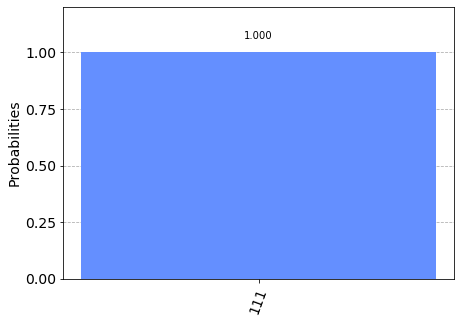

In [32]:
backend=Aer.get_backend('qasm_simulator')

jobIBM=qk.execute([testZ],backend=backend,shots=1024)
result=jobIBM.result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 

#### Choose backend: ibmqx2 chip

In [33]:
my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')

jobIBM=qk.execute([testZ],backend=backend,shots=1024)
result=jobIBM.result()

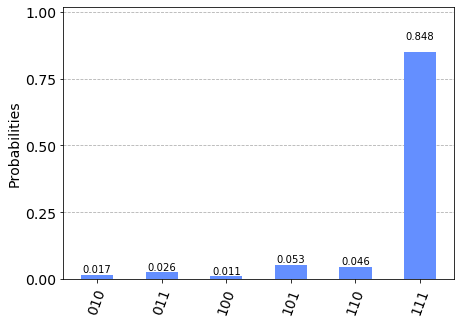

In [34]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(testZ)) 